### 1. Сгенерируйте данные с помощью кода

In [1]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [2]:
x_data_generated

array([[ 0.52250033, -0.18393884,  0.54777846, ..., -0.16946702,
        -2.71007998,  1.72767528],
       [ 0.32920995, -0.89091747,  0.24246825, ..., -0.4345322 ,
         0.91471977,  1.49476447],
       [ 1.58457983, -1.58357343, -0.29840953, ..., -2.71636365,
        -0.20603709, -0.52158213],
       ...,
       [ 1.62749376, -2.1562638 , -0.37554523, ...,  0.4831148 ,
         2.43012402, -0.48202123],
       [ 1.88002913,  0.4866338 ,  0.95264039, ...,  2.23744005,
         1.21994969, -1.7578802 ],
       [-1.29287614, -0.12298926, -0.97714003, ...,  2.2176892 ,
        -0.51344106, -0.72272112]])

In [3]:
y_data_generated

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

### 2. Постройте модель логистической регрессии и оцените среднюю точность

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression()

In [7]:
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()

0.85

### 3. Используйте статистические методы для отбора признаков:

###### a) Выберите признаки на основе матрицы корреляции.

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.DataFrame()

In [34]:
df[['Weight', 'Shape', 'Volume', 'Texture', 'Color', 'Flexibility', 'Transparency', 'Conductivity', 
    'Magnetism', 'Smell', 'Taste', 'Hardness', 'Viscosity', 'Luminosity', 'Gravity', 'Density', 'Thickness', 
    'Durability', 'Melting point', 'Reflectivity']] = pd.DataFrame(data=x_data_generated)
df

,Weight,Shape,Volume,Texture,Color,Flexibility,Transparency,Conductivity,Magnetism,Smell,Taste,Hardness,Viscosity,Luminosity,Gravity,Density,Thickness,Durability,Melting point,Reflectivity
0,0.522500,-0.183939,0.547778,-0.569312,1.085668,-1.034127,-0.365809,-1.256453,-2.475211,1.625684,0.789063,-0.468891,-0.117191,2.222274,-1.128718,0.794872,-0.579219,-0.169467,-2.710080,1.727675
1,0.329210,-0.890917,0.242468,-0.129727,0.786439,-0.011432,0.024253,-2.935641,0.307802,0.601680,-0.591968,-0.553574,0.856314,-0.555622,-0.497325,0.282806,1.928875,-0.434532,0.914720,1.494764
2,1.584580,-1.583573,-0.298410,-0.147568,-0.331767,-0.803173,1.255054,2.033535,1.730754,0.738127,0.112163,0.273903,1.362638,-0.378377,1.444719,-0.174829,-1.999652,-2.716364,-0.206037,-0.521582
3,0.949268,-0.220942,-0.648721,-0.066735,-0.556826,2.059895,-1.118174,1.536298,-0.428062,-0.677596,0.469004,0.269531,1.757708,-0.392157,-0.522421,-0.097558,-1.131576,-0.502619,-1.458732,-0.687655
4,0.184210,-0.979549,1.766494,0.866004,0.417419,-1.401739,-0.421092,1.376958,-0.058239,-0.205026,0.204320,0.123299,-0.999270,0.359084,1.277875,1.651577,-1.730506,1.260926,0.483043,-0.061607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.054048,0.317634,0.169702,0.086325,-0.870998,-1.053390,0.078208,-1.507136,1.092457,1.954417,-0.763868,-0.114641,0.289232,-0.010055,-1.568584,0.045496,2.017136,-1.314231,-0.758011,-0.027847
96,0.816266,0.695171,1.988960,-1.876434,-0.543564,0.489057,1.190070,-0.296411,-0.043180,-1.037051,-0.163423,0.182990,-0.664136,-1.062512,0.607133,-0.315531,1.641457,-0.308569,1.840407,-0.969458
97,1.627494,-2.156264,-0.375545,0.230248,-1.521531,-1.870306,-0.938164,-0.977739,0.034151,-0.712715,0.583443,0.024551,-0.439585,0.051159,0.094107,-0.470653,1.907681,0.483115,2.430124,-0.482021
98,1.880029,0.486634,0.952640,-0.105117,-0.265335,-0.372364,-0.547109,1.226323,-0.361900,0.125866,0.294974,0.472920,-1.550174,1.237536,-1.799101,1.449650,0.657827,2.237440,1.219950,-1.757880


In [35]:
df['target'] = y_data_generated

In [36]:
df

,Weight,Shape,Volume,Texture,Color,Flexibility,Transparency,Conductivity,Magnetism,Smell,...,Hardness,Viscosity,Luminosity,Gravity,Density,Thickness,Durability,Melting point,Reflectivity,target
0,0.522500,-0.183939,0.547778,-0.569312,1.085668,-1.034127,-0.365809,-1.256453,-2.475211,1.625684,...,-0.468891,-0.117191,2.222274,-1.128718,0.794872,-0.579219,-0.169467,-2.710080,1.727675,1
1,0.329210,-0.890917,0.242468,-0.129727,0.786439,-0.011432,0.024253,-2.935641,0.307802,0.601680,...,-0.553574,0.856314,-0.555622,-0.497325,0.282806,1.928875,-0.434532,0.914720,1.494764,1
2,1.584580,-1.583573,-0.298410,-0.147568,-0.331767,-0.803173,1.255054,2.033535,1.730754,0.738127,...,0.273903,1.362638,-0.378377,1.444719,-0.174829,-1.999652,-2.716364,-0.206037,-0.521582,1
3,0.949268,-0.220942,-0.648721,-0.066735,-0.556826,2.059895,-1.118174,1.536298,-0.428062,-0.677596,...,0.269531,1.757708,-0.392157,-0.522421,-0.097558,-1.131576,-0.502619,-1.458732,-0.687655,0
4,0.184210,-0.979549,1.766494,0.866004,0.417419,-1.401739,-0.421092,1.376958,-0.058239,-0.205026,...,0.123299,-0.999270,0.359084,1.277875,1.651577,-1.730506,1.260926,0.483043,-0.061607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.054048,0.317634,0.169702,0.086325,-0.870998,-1.053390,0.078208,-1.507136,1.092457,1.954417,...,-0.114641,0.289232,-0.010055,-1.568584,0.045496,2.017136,-1.314231,-0.758011,-0.027847,0
96,0.816266,0.695171,1.988960,-1.876434,-0.543564,0.489057,1.190070,-0.296411,-0.043180,-1.037051,...,0.182990,-0.664136,-1.062512,0.607133,-0.315531,1.641457,-0.308569,1.840407,-0.969458,0
97,1.627494,-2.156264,-0.375545,0.230248,-1.521531,-1.870306,-0.938164,-0.977739,0.034151,-0.712715,...,0.024551,-0.439585,0.051159,0.094107,-0.470653,1.907681,0.483115,2.430124,-0.482021,0
98,1.880029,0.486634,0.952640,-0.105117,-0.265335,-0.372364,-0.547109,1.226323,-0.361900,0.125866,...,0.472920,-1.550174,1.237536,-1.799101,1.449650,0.657827,2.237440,1.219950,-1.757880,0


In [14]:
#для читаемости разобью на два датафрейма
df1 = df[['Weight', 'Shape', 'Volume', 'Texture', 'Color', 'Flexibility', 'Transparency', 'Conductivity', 
    'Magnetism', 'Smell', 'target']]

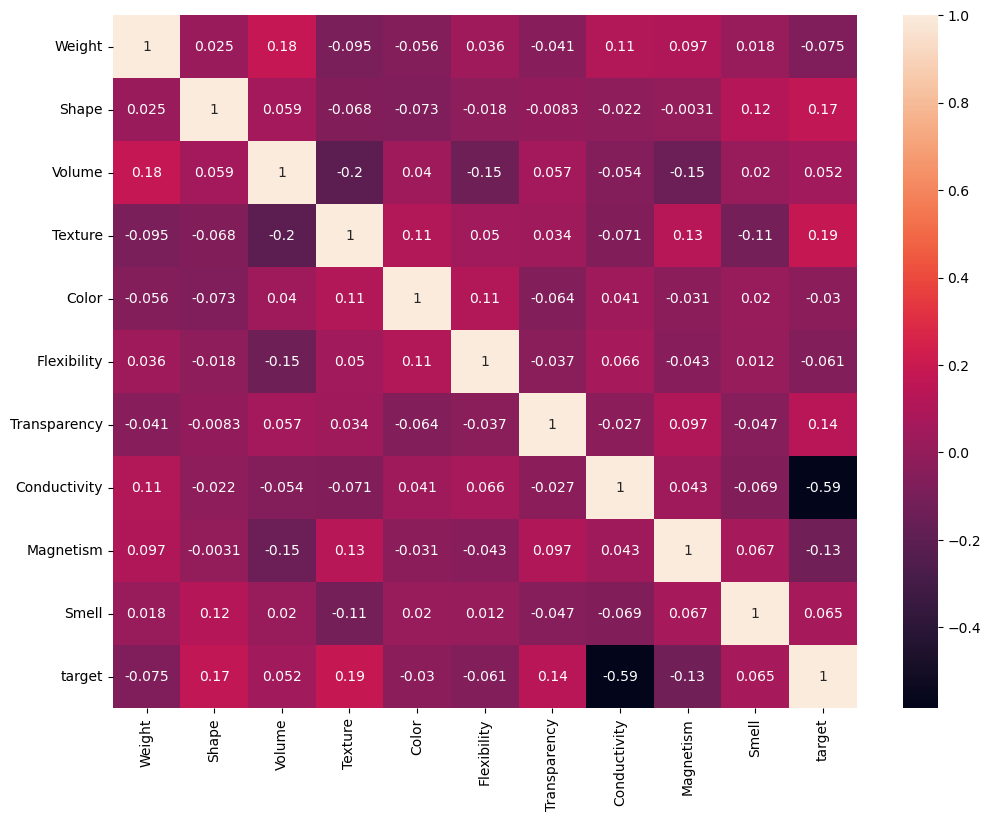

In [21]:
corr = df1.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#надо удалять признаки с близкой к нулевой корреляции с таргетом
#Smell, Magnetizm,  Transparency, Flexibility, Color, Volume, Weight

In [16]:
df2 = df[['Taste', 'Hardness', 'Viscosity', 'Luminosity', 'Gravity', 'Density', 'Thickness', 
    'Durability', 'Melting point', 'Reflectivity', 'target']]

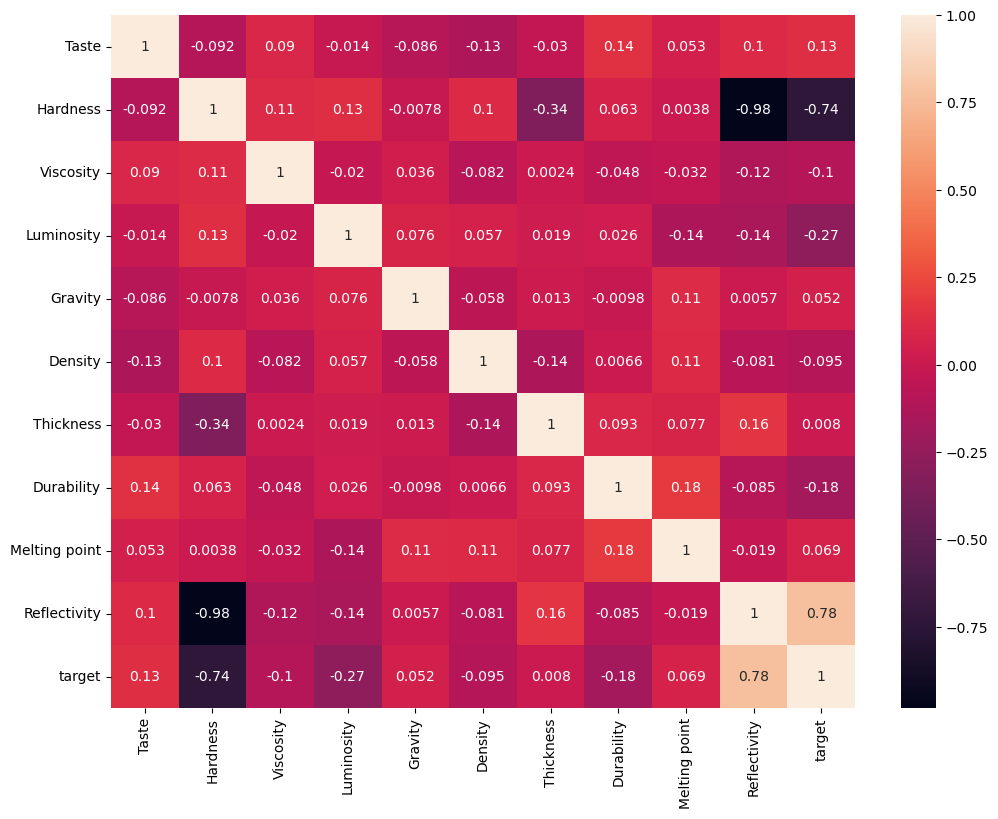

In [22]:
corr = df2.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
#околонулевая корреляция с таргетом у:
#Melting point, Thickness, Density, Gravity, Visconsity, Taste

###### b) Отсеките низковариативные признаки (VarianceThreshold).

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [30]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
df_variance = sel.fit_transform(df)
df_variance[0]

array([ 0.52250033, -0.18393884,  0.54777846, -0.56931246,  1.08566793,
       -1.03412676, -0.36580888, -1.25645271, -2.47521061,  1.62568357,
        0.78906316, -0.46889059, -0.11719135,  2.22227364, -1.12871778,
        0.79487205, -0.57921872, -0.16946702, -2.71007998,  1.72767528,
        1.        ])

In [38]:
data_variance = pd.DataFrame()

In [39]:
data_variance[['Weight', 'Shape', 'Volume', 'Texture', 'Color', 'Flexibility', 'Transparency', 'Conductivity', 
    'Magnetism', 'Smell', 'Taste', 'Hardness', 'Viscosity', 'Luminosity', 'Gravity', 'Density', 'Thickness', 
    'Durability', 'Melting point', 'Reflectivity', 'Target']] = pd.DataFrame(data=df_variance)

In [40]:
data_variance

,Weight,Shape,Volume,Texture,Color,Flexibility,Transparency,Conductivity,Magnetism,Smell,...,Hardness,Viscosity,Luminosity,Gravity,Density,Thickness,Durability,Melting point,Reflectivity,Target
0,0.522500,-0.183939,0.547778,-0.569312,1.085668,-1.034127,-0.365809,-1.256453,-2.475211,1.625684,...,-0.468891,-0.117191,2.222274,-1.128718,0.794872,-0.579219,-0.169467,-2.710080,1.727675,1.0
1,0.329210,-0.890917,0.242468,-0.129727,0.786439,-0.011432,0.024253,-2.935641,0.307802,0.601680,...,-0.553574,0.856314,-0.555622,-0.497325,0.282806,1.928875,-0.434532,0.914720,1.494764,1.0
2,1.584580,-1.583573,-0.298410,-0.147568,-0.331767,-0.803173,1.255054,2.033535,1.730754,0.738127,...,0.273903,1.362638,-0.378377,1.444719,-0.174829,-1.999652,-2.716364,-0.206037,-0.521582,1.0
3,0.949268,-0.220942,-0.648721,-0.066735,-0.556826,2.059895,-1.118174,1.536298,-0.428062,-0.677596,...,0.269531,1.757708,-0.392157,-0.522421,-0.097558,-1.131576,-0.502619,-1.458732,-0.687655,0.0
4,0.184210,-0.979549,1.766494,0.866004,0.417419,-1.401739,-0.421092,1.376958,-0.058239,-0.205026,...,0.123299,-0.999270,0.359084,1.277875,1.651577,-1.730506,1.260926,0.483043,-0.061607,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.054048,0.317634,0.169702,0.086325,-0.870998,-1.053390,0.078208,-1.507136,1.092457,1.954417,...,-0.114641,0.289232,-0.010055,-1.568584,0.045496,2.017136,-1.314231,-0.758011,-0.027847,0.0
96,0.816266,0.695171,1.988960,-1.876434,-0.543564,0.489057,1.190070,-0.296411,-0.043180,-1.037051,...,0.182990,-0.664136,-1.062512,0.607133,-0.315531,1.641457,-0.308569,1.840407,-0.969458,0.0
97,1.627494,-2.156264,-0.375545,0.230248,-1.521531,-1.870306,-0.938164,-0.977739,0.034151,-0.712715,...,0.024551,-0.439585,0.051159,0.094107,-0.470653,1.907681,0.483115,2.430124,-0.482021,0.0
98,1.880029,0.486634,0.952640,-0.105117,-0.265335,-0.372364,-0.547109,1.226323,-0.361900,0.125866,...,0.472920,-1.550174,1.237536,-1.799101,1.449650,0.657827,2.237440,1.219950,-1.757880,0.0


In [ ]:
#ничего не отсеклось, можно продолжить работать с df

###### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b

In [44]:
df_3 = data_variance.drop(columns = ['Smell', 'Magnetism',  'Transparency', 'Flexibility', 'Color', 'Volume', 'Weight', 
                              'Melting point', 'Thickness', 'Density', 'Gravity', 'Viscosity', 'Taste'], axis = 1)

In [45]:
df_3

,Shape,Texture,Conductivity,Hardness,Luminosity,Durability,Reflectivity,Target
0,-0.183939,-0.569312,-1.256453,-0.468891,2.222274,-0.169467,1.727675,1.0
1,-0.890917,-0.129727,-2.935641,-0.553574,-0.555622,-0.434532,1.494764,1.0
2,-1.583573,-0.147568,2.033535,0.273903,-0.378377,-2.716364,-0.521582,1.0
3,-0.220942,-0.066735,1.536298,0.269531,-0.392157,-0.502619,-0.687655,0.0
4,-0.979549,0.866004,1.376958,0.123299,0.359084,1.260926,-0.061607,0.0
...,...,...,...,...,...,...,...,...
95,0.317634,0.086325,-1.507136,-0.114641,-0.010055,-1.314231,-0.027847,0.0
96,0.695171,-1.876434,-0.296411,0.182990,-1.062512,-0.308569,-0.969458,0.0
97,-2.156264,0.230248,-0.977739,0.024551,0.051159,0.483115,-0.482021,0.0
98,0.486634,-0.105117,1.226323,0.472920,1.237536,2.237440,-1.757880,0.0


In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
x_data_generated = df_3[['Shape', 'Texture', 'Conductivity', 'Hardness', 'Luminosity', 'Durability', 'Reflectivity']]
y_data_generated = df_3[['Target']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()

0.95

In [ ]:
#увеличилась точность до 95%

### 4. Осуществите отбор признаков на основе дисперсионного анализа:

###### a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [57]:
selector = SelectKBest(f_classif, k=5)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

##### b) Повторите п. 2 на отобранных признаках.

In [64]:
model = LogisticRegression()
model.fit(X_tr, y_train)

LogisticRegression()

In [65]:
cross_val_score(LogisticRegression(), X_t, y_test, scoring='accuracy').mean()

0.9

In [ ]:
#лучше, чем без обработки, но хуже, чем с ручным отбором по корреляции

### 5. Отбор с использованием моделей:

###### a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
x_data_generated = df[['Weight', 'Shape', 'Volume', 'Texture', 'Color', 'Flexibility', 'Transparency', 'Conductivity', 
    'Magnetism', 'Smell', 'Taste', 'Hardness', 'Viscosity', 'Luminosity', 'Gravity', 'Density', 'Thickness', 
    'Durability', 'Melting point', 'Reflectivity']]

In [195]:
y_data_generated = df[['target']]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [197]:
#смотрим на точность с логистической регрессией
rf = LogisticRegression(random_state=1).fit(X_train, y_train)
rf.score(X_test, y_test)

0.95

In [198]:
np.arange(len(rf.coef_[0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [199]:
rf.coef_

array([[ 0.116174  ,  0.33488767, -0.06559021,  0.02695465,  0.03098228,
         0.13363859, -0.14070951, -0.95215284, -0.27478794,  0.19363605,
         0.23278744, -0.4126186 , -0.10266823, -0.61475361,  0.35455754,
         0.06383355, -0.78588145, -0.81658654,  0.6108864 ,  1.57793762]])

In [200]:
import numpy as np

In [201]:
#для рисунка без отрицательных значений
rf_abs = np.array([])
for i in rf.coef_[0]:
    rf_abs = np.append(rf_abs, abs(i))
print(rf_abs)

[0.116174   0.33488767 0.06559021 0.02695465 0.03098228 0.13363859
 0.14070951 0.95215284 0.27478794 0.19363605 0.23278744 0.4126186
 0.10266823 0.61475361 0.35455754 0.06383355 0.78588145 0.81658654
 0.6108864  1.57793762]


Text(0, 0.5, 'coefs')

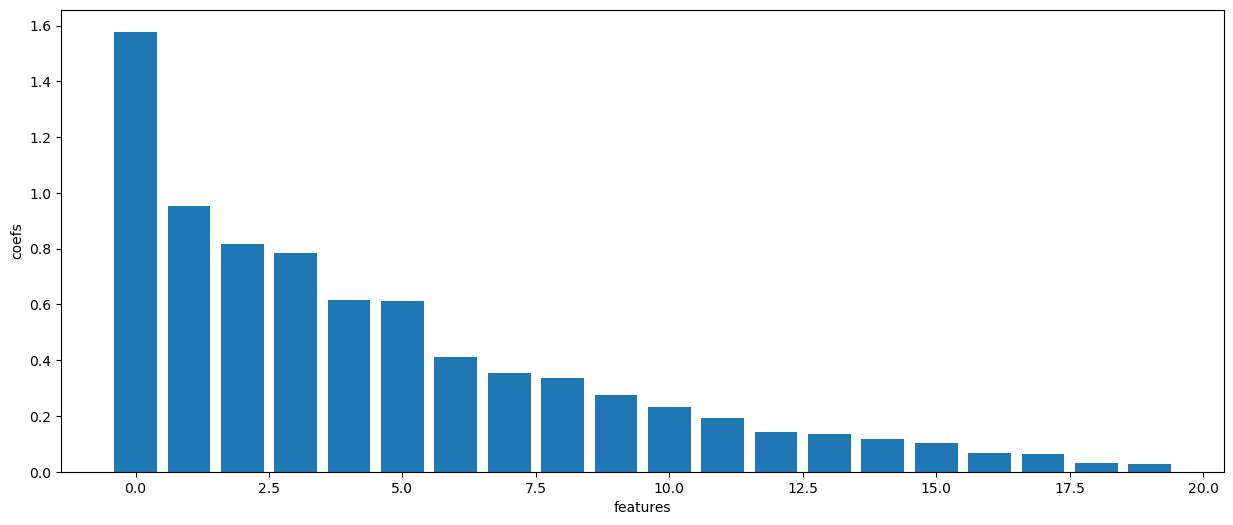

In [202]:
#несмотря на идеальный результат, можно уменьшить количество признаков. выводим их важность
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.coef_[0])), sorted(rf_abs, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs')
#Отрицательный коэффициент означает, что более высокое значение соответствующего 
#признака приближает классификацию к отрицательному классу. 

In [240]:
from sklearn.feature_selection import RFE

selector = RFE(rf, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True])

In [241]:
X_train.columns

Index(['Weight', 'Shape', 'Volume', 'Texture', 'Color', 'Flexibility',
       'Transparency', 'Conductivity', 'Magnetism', 'Smell', 'Taste',
       'Hardness', 'Viscosity', 'Luminosity', 'Gravity', 'Density',
       'Thickness', 'Durability', 'Melting point', 'Reflectivity'],
      dtype='object')

In [242]:
selector.ranking_

array([14,  6, 15, 18, 17, 12, 11,  1,  9, 10,  8,  5, 13,  3,  7, 16,  1,
        2,  4,  1])

In [243]:
X_tr = selector.transform(X_train)
X_t = selector.transform(X_test)

rf = LogisticRegression(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)
#сначала оставила 10, но если оставить 5 признаков, точность не меняется

0.9

In [244]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, prefit=False, max_features=5, threshold=0.05) #здесь два условия отсечки. 
#max_features максимум признаков которые оставляем 
#threshold - знАчимость признака (на графике coefs). 
#в зависимоти от того что первое достигается, то и остаётся
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

In [245]:
rf = LogisticRegression(random_state=1).fit(X_tr, y_train)
rf.score(X_t, y_test)

1.0

In [ ]:
#стало идеально

### 6. Перебор признаков:

###### a) SequentialFeatureSelector.

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [71]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=5, direction="forward"
)
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1),
                          n_features_to_select=5)

###### b) Повторите п. 2 на отобранных признаках.

In [72]:
X_tr = sfs_forward.transform(X_train)
X_t = sfs_forward.transform(X_test)

In [73]:
cross_val_score(LogisticRegression(), X_t, y_test, scoring='accuracy').mean()

0.95

In [ ]:
#точность снова 95%

### 7. Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [268]:
pd.DataFrame([['Способ выбора признаков', 'Количество признаков', 'Средняя точность модели'],
              ['Без отбора', '20', '85%'],
              ['Матрица корреляции', '7', '95%'],
              ['SelectKBest', '5', '90%'],
              ['RFE', '3', '90%'],
              ['SelectFromModel', '5', '100%'],
              ['SequentialFeatureSelector', '5', '95%']]).style\
                .set_properties(**{'font-size': '10pt', 'color': 'black'})\
                .apply(lambda x: ['background-color:Lavender' for it in x], subset=0, axis=0)\
                .hide(axis='columns').hide(axis='index')

Способ выбора признаков,Количество признаков,Средняя точность модели
Без отбора,20,85%
Матрица корреляции,7,95%
SelectKBest,5,90%
RFE,3,90%
SelectFromModel,5,100%
SequentialFeatureSelector,5,95%
